Para habilitar o autocomplete e o Jupyer funcionar igual uma IDE decente

In [1]:
%config Completer.use_jedi = False

Não use R, use Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Constantes (alterar para mudar os gráficos)

In [26]:
class Constants:
    AMOUNT_NODES = 60
    BUFFER_SIZE = '50M'
    TRANSMIT_RANGE = 25
    PROTOCOLS = ['ProphetRouter', 'SprayAndWaitRouter', 'EpidemicRouter', 'WaveRouter']

DataFrame pricipal com todos os dados da simulação

In [4]:
dataframe = pd.read_json('../DATA.json')

Gráficos!

In [32]:
def generate_chart_data(dataframe: pd.DataFrame, 
                        protocols: list[str], 
                        buffer_size: str, 
                        amount_nodes: int,
                        transmit_range: int,
                        x_axis: str, 
                        y_axis: str) -> list[tuple[str, pd.DataFrame]]:
    
    chart_data = []

    for protocol in protocols:
        if amount_nodes and transmit_range:
            filtered_data = dataframe.loc[(dataframe.routing_protocol == protocol) &
                                          (dataframe.amount_nodes == amount_nodes) &
                                          (dataframe.transmit_range == transmit_range)
                                         ][[x_axis, y_axis]] 
        elif amount_nodes:
            filtered_data = dataframe.loc[(dataframe.routing_protocol == protocol) &
                                          (dataframe.buffer_size == buffer_size) & 
                                          (dataframe.amount_nodes == amount_nodes)
                                         ][[x_axis, y_axis]]
        elif transmit_range:
            filtered_data = dataframe.loc[(dataframe.routing_protocol == protocol) &
                                          (dataframe.buffer_size == buffer_size) & 
                                          (dataframe.transmit_range == transmit_range)
                                         ][[x_axis, y_axis]]
        else:
            return

        chart_data.append((protocol, filtered_data))
    
    return chart_data

In [11]:
def plot_chart(chart_data: tuple[str, pd.DataFrame],
               x_label: str,
               y_label: str,
               x_axis: str, 
               y_axis: str,
               title: str) -> None:
    
    plt.clf()
    plt.xlabel(x_label, fontweight='bold')
    plt.ylabel(y_label, fontweight='bold')
    plt.suptitle(title)

    for label, data in chart_data:
        plt.plot(data[x_axis], data[y_axis], label=label)

    plt.legend()
    plt.show()

----------------

## Alcance de Transmissão

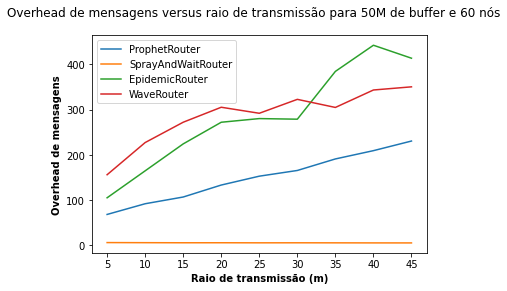

In [33]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=Constants.BUFFER_SIZE,
                                 amount_nodes=Constants.AMOUNT_NODES,
                                 transmit_range=None,
                                 x_axis='transmit_range',
                                 y_axis='overhead_ratio')

plot_chart(chart_data=chart_data,
           x_label='Raio de transmissão (m)',
           y_label='Overhead de mensagens',
           x_axis='transmit_range',
           y_axis='overhead_ratio',
           title=f'Overhead de mensagens versus raio de transmissão para {Constants.BUFFER_SIZE} de buffer e {Constants.AMOUNT_NODES} nós')

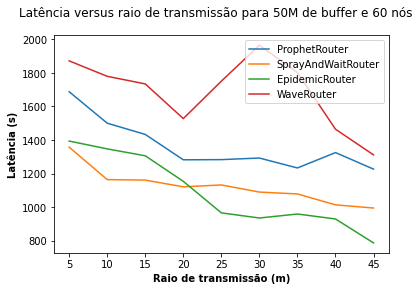

In [34]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=Constants.BUFFER_SIZE,
                                 amount_nodes=Constants.AMOUNT_NODES,
                                 transmit_range=None,
                                 x_axis='transmit_range',
                                 y_axis='latency_avg')

plot_chart(chart_data=chart_data,
           x_label='Raio de transmissão (m)',
           y_label='Latência (s)',
           x_axis='transmit_range',
           y_axis='latency_avg',
           title=f'Latência versus raio de transmissão para {Constants.BUFFER_SIZE} de buffer e {Constants.AMOUNT_NODES} nós')

## Escalabilidade da rede

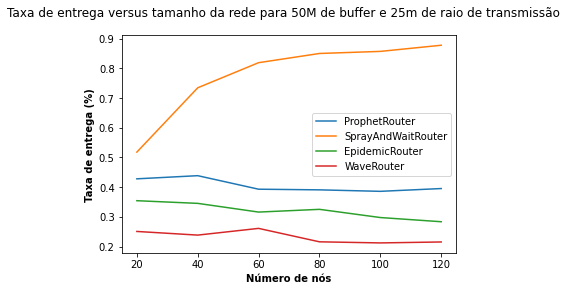

In [35]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=Constants.BUFFER_SIZE,
                                 amount_nodes=None,
                                 transmit_range=Constants.TRANSMIT_RANGE,
                                 x_axis='amount_nodes',
                                 y_axis='delivery_prob')

plot_chart(chart_data=chart_data,
           x_label='Número de nós',
           y_label='Taxa de entrega (%)',
           x_axis='amount_nodes',
           y_axis='delivery_prob',
           title=f'Taxa de entrega versus tamanho da rede para {Constants.BUFFER_SIZE} de buffer e {Constants.TRANSMIT_RANGE}m de raio de transmissão')

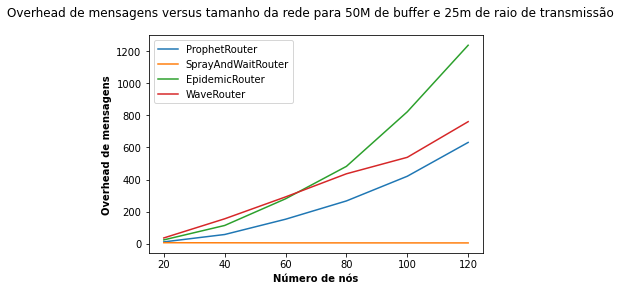

In [36]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=Constants.BUFFER_SIZE,
                                 amount_nodes=None,
                                 transmit_range=Constants.TRANSMIT_RANGE,
                                 x_axis='amount_nodes',
                                 y_axis='overhead_ratio')

plot_chart(chart_data=chart_data,
           x_label='Número de nós',
           y_label='Overhead de mensagens',
           x_axis='amount_nodes',
           y_axis='overhead_ratio',
           title=f'Overhead de mensagens versus tamanho da rede para {Constants.BUFFER_SIZE} de buffer e {Constants.TRANSMIT_RANGE}m de raio de transmissão')

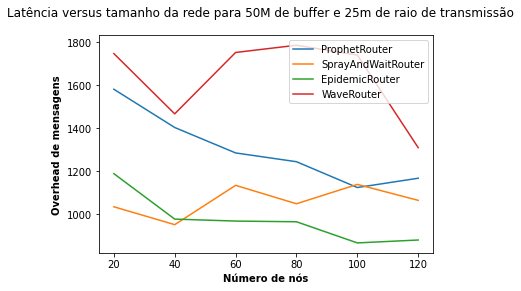

In [37]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=Constants.BUFFER_SIZE,
                                 amount_nodes=None,
                                 transmit_range=Constants.TRANSMIT_RANGE,
                                 x_axis='amount_nodes',
                                 y_axis='latency_avg')

plot_chart(chart_data=chart_data,
           x_label='Número de nós',
           y_label='Overhead de mensagens',
           x_axis='amount_nodes',
           y_axis='latency_avg',
           title=f'Latência versus tamanho da rede para {Constants.BUFFER_SIZE} de buffer e {Constants.TRANSMIT_RANGE}m de raio de transmissão')

## Tamanho do buffer

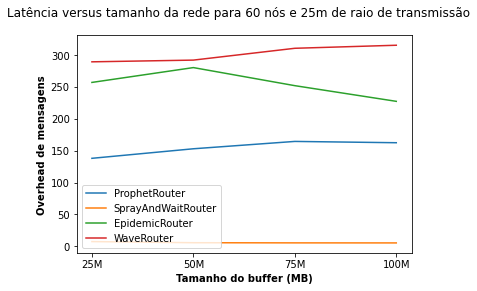

In [39]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=None,
                                 amount_nodes=Constants.AMOUNT_NODES,
                                 transmit_range=Constants.TRANSMIT_RANGE,
                                 x_axis='buffer_size',
                                 y_axis='overhead_ratio')

plot_chart(chart_data=chart_data,
           x_label='Tamanho do buffer (MB)',
           y_label='Overhead de mensagens',
           x_axis='buffer_size',
           y_axis='overhead_ratio',
           title=f'Latência versus tamanho da rede para {Constants.AMOUNT_NODES}  e {Constants.TRANSMIT_RANGE}m de raio de transmissão')

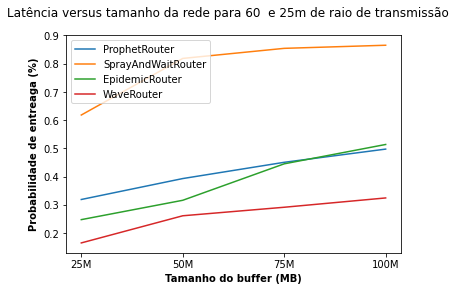

In [40]:
chart_data = generate_chart_data(dataframe=dataframe,
                                 protocols=Constants.PROTOCOLS,
                                 buffer_size=None,
                                 amount_nodes=Constants.AMOUNT_NODES,
                                 transmit_range=Constants.TRANSMIT_RANGE,
                                 x_axis='buffer_size',
                                 y_axis='delivery_prob')

plot_chart(chart_data=chart_data,
           x_label='Tamanho do buffer (MB)',
           y_label='Probabilidade de entreaga (%)',
           x_axis='buffer_size',
           y_axis='delivery_prob',
           title=f'Latência versus tamanho da rede para {Constants.AMOUNT_NODES}  e {Constants.TRANSMIT_RANGE}m de raio de transmissão')